# Examples for the code in Physics.py

Physical constants:

In [1]:
# import constants
from Physics import kB_eV
print(f'T=1K    <=> {kB_eV*1e6:.0f}µeV')
print(f'T=300K  <=> {kB_eV*300*1e3:.0f}meV')

T=1K    <=> 86µeV
T=300K  <=> 26meV


# Thermal distribution functions

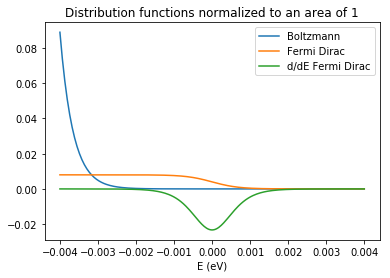

In [2]:
from Physics import Boltzmann_eV,Fermi_Dirac_eV,ddE_Fermi_Dirac_eV
import numpy as np
import matplotlib.pyplot as plt

T = 4
x = np.linspace(-4e-3,4e-3,250)

b = Boltzmann_eV(x,T)
plt.plot(x,b/np.sum(b),label='Boltzmann')

fd = Fermi_Dirac_eV(x,T)
plt.plot(x,fd/np.sum(fd),label='Fermi Dirac')

dde_fd =ddE_Fermi_Dirac_eV(x,T)
plt.plot(x,-1*dde_fd/np.sum(dde_fd),label='d/dE Fermi Dirac')

plt.xlabel('E (eV)')

plt.title('Distribution functions normalized to an area of 1')
plt.legend()
plt.show()

# Gaussian

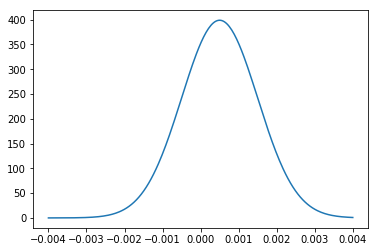

In [3]:
from Physics import Gaussian
plt.plot(x,Gaussian(x,std=1e-3,x0=0.5e-3))

# Superconductors

## Maki DOS

Density of states of a superconductor according to the Maki model taking into account a pair breaking parameter $\xi$ (xi).

The analytical formula is rather long. See the appendix section of this paper: https://doi.org/10.1063/1.4793793

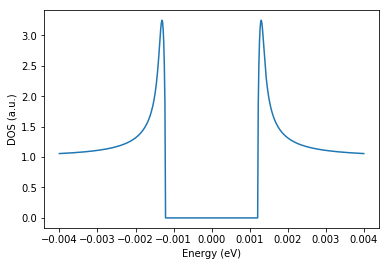

In [4]:
from Physics import Maki_DOS
x = np.linspace(-4e-3,4e-3,500)
plt.plot(x,Maki_DOS(E=x,Delta=1.3e-3,xi=1e-2))
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (a.u.)')
plt.show()

## BCS

#### Temperature vs Gap

In [5]:
from Physics import BCS

T_c = 8 # K
print(f'A Tc of {T_c}K corresponds to a zero temperature gap of {BCS.Delta0_of_Tc(T_c)*1e3:.2f}meV.')

A Tc of 8K corresponds to a zero temperature gap of 1.21meV.


In [6]:
Delta0 = 1.35 # meV
print(f'A zero temperature gap of {Delta0}meV corresponds to a zero temperature gap of {BCS.Tc_of_Delta0(Delta0*1e-3):.2f}K.')

A zero temperature gap of 1.35meV corresponds to a zero temperature gap of 8.90K.


Plot the full $\Delta (T)$ dependence

d:\DavidWANDER\Codes\Python\DataAnalysisToolbox\Packed\V2.0\Physics.py:210: RuntimeWarning: divide by zero encountered in true_divide
  y = np.tanh(0.882*d/t*sq)/sq


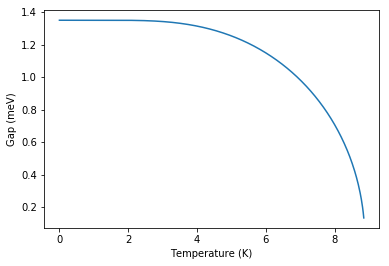

In [7]:
T = np.linspace(0,8.85,500)
plt.plot(T,1e3*BCS.Delta_of_T(T,8.9))
plt.xlabel('Temperature (K)')
plt.ylabel('Gap (meV)')
plt.show()

Plot the inverse: T($\Delta$)

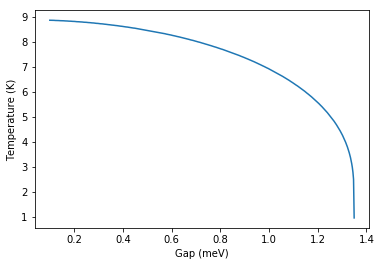

In [8]:
Delta = np.linspace(0.1e-3,1.35e-3,500)           # be careful with the limits. Delta must be larger than 0
plt.plot(Delta*1e3,BCS.T_of_Delta(Delta,1.35e-3))
plt.ylabel('Temperature (K)')
plt.xlabel('Gap (meV)')
plt.show()

### DOS

The density of states of the pure BCS model

$\rho_{\mathrm{BCS}} = N_0 \left|\frac{E}{\sqrt{E^2 - \Delta^2}} \right|$ where $N_0$ is the normal state conductance and $\Delta$ the superconducting gap

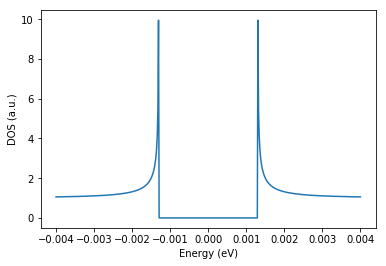

In [9]:
E = np.linspace(-4e-3,4e-3,500)
plt.plot(x,BCS.DOS(E=x,Delta=1.3e-3))
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (a.u.)')
plt.show()

Numerically, the divergence at $\pm \Delta$ can be challenging. Things become easier to handle by introducing a small broadening using the Dynes model (for quasiparticle lifetime-broadening ):

$\rho_{\mathrm{Dynes}} = N_0 \left|\mathrm{Re}\left(\frac{E-i\Gamma}{\sqrt{(E-i\Gamma)^2 - \Delta^2}} \right)\right|$ where $N_0$ is the normal state conductance, $\Gamma$ the Dynes parameter and $\Delta$ the superconducting gap

See: https://doi.org/10.1103/PhysRevLett.41.1509

DOS with finite Dynes parameter (20µV):

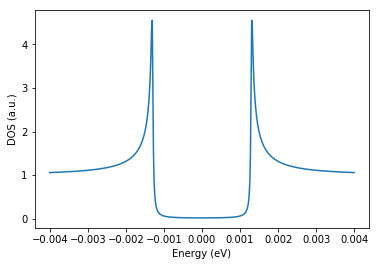

In [10]:
E = np.linspace(-4e-3,4e-3,500)
plt.plot(x,BCS.DOS(E=x,Delta=1.3e-3,Gamma=20e-6))
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (a.u.)')
plt.show()

## NIS spectroscopy
The finite temperature leads to a broadening of the Fermi-Dirac distribution in the tip, resulting in a broadening of features of the sample DOS.

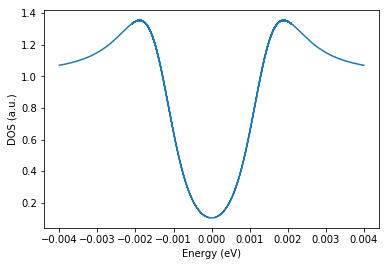

In [11]:
fig, ax = plt.subplots()
NIS_spectrum = BCS.dIdV_NIS_eV(E_range=(-4e-3,4e-3),E_res = 1e-6, 
    Delta = 1.35e-3, T_N = 4)
NIS_spectrum.plot(ax)
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('DOS (a.u.)')
plt.show()

# Effect of the Lock-in on Tunneling Spectroscopy

The lock-in amplifier adds a sinusoidal excitation to the bias voltage. In the following, we denote $V_{\mathrm{AC}}$ the peak amplitude and $V_{\mathrm{rms}}=V_{\mathrm{AC}}/\sqrt{2}$ the root-mean-square amplitude of this signal. The full width at half maximum (FWHM) of the smearing it causes is $\sqrt{6}~V_{\mathrm{rms}}$. 
Ideally, $V_{\mathrm{rms}}$ should be chosen such that this value is smaller than the FWHM of all features in the DOS. 
One can easily derive the exact shape of the broadening. It is given by the broadening function 
\begin{equation}
R(E) = \frac{2}{\pi V_{\mathrm{AC}}} \sqrt{(eV_{\mathrm{AC}})^2-E^2}~.
\end{equation}
The measured signal is then the convolution of the broadening function with the samples ``real'' $\mathrm{d}I/\mathrm{d}V$, yielding: 
\begin{equation}
	\left[ \frac{\mathrm{d}I}{\mathrm{d}V}(V)\right]_{\mathrm{measured}} \propto \int_{-eV_{\mathrm{AC}}}^{eV_{\mathrm{AC}}} \frac{\mathrm{d}I}{\mathrm{d}V}(V+E)~R(E)~\mathrm{d}E~.
\end{equation}


See http://dx.doi.org/10.17169/refubium-6514 for a derivation of the above formula.

### Delta peak

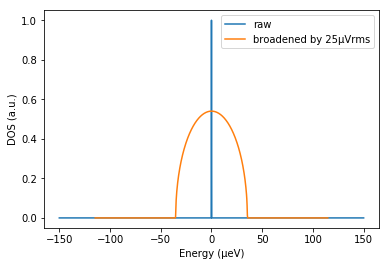

In [31]:
E = np.linspace(-150e-6,150e-6,1001)
delta = np.zeros(E.shape)
delta[E==0] = 1

raw_spectrum = Curve(E,delta,title='raw')
broadened = apply_lock_in_broadening(raw_spectrum,V_ac_rms=25e-6)*1e2
broadened.set_plot_properties(dict(title='broadened by 25µVrms'))

fig,ax = plt.subplots()
raw_spectrum.apply_transformation(lambda x,y: (x*1e6,y)).plot(ax)
broadened.apply_transformation(lambda x,y: (x*1e6,y)).plot(ax)
plt.xlabel('Energy (µeV)')
plt.ylabel('DOS (a.u.)')
plt.legend()
plt.show()

### Superconducting DOS

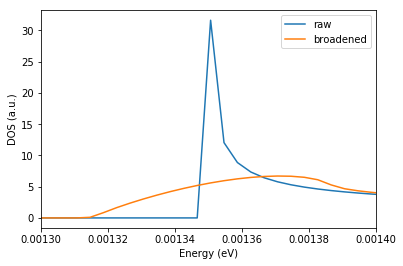

In [19]:
from Physics import apply_lock_in_broadening
from simscidapy import Curve

E = np.linspace(-4e-3,4e-3,2000)
raw_spectrum = Curve(E,BCS.DOS(E,Delta=1.35e-3),title='raw')
broadened = apply_lock_in_broadening(raw_spectrum,V_ac_rms=25e-6)
broadened.set_plot_properties(dict(title='broadened'))

fig,ax = plt.subplots()
raw_spectrum.plot(ax)
broadened.plot(ax)
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (a.u.)')
plt.legend()
plt.xlim(1.3e-3,1.4e-3)
plt.show()